# Explore here

In [12]:
import requests
import os
#from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the .env file variables
load_dotenv()
SPOTIPY_CLIENT_ID = os.getenv('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET = os.getenv('SPOTIPY_CLIENT_SECRET')
AUTH_URL = 'https://accounts.spotify.com/api/token'

In [3]:
#Load Tracks Information

soja_uri = 'spotify:artist:2vaWvC8suCFkRXejDOK7EE'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_top_tracks(soja_uri)

top_tracks = results['tracks'][:10]

In [4]:
#Convert to DataFrame

names = []
popularity = []
duration_ms = []

for track in top_tracks:
    names.append(track['name'])
    popularity.append(track['popularity'])
    duration_ms.append(track['duration_ms'])

top_tracks_df = pd.DataFrame({
    'name': names,
    'popularity': popularity,
    'duration': duration_ms
    })

In [5]:
#Convert to Numerical and Change miliseconds to minutes

top_tracks_df['popularity'] = top_tracks_df['popularity'].astype(float)
top_tracks_df['duration'] = top_tracks_df['duration'].astype(int)

top_tracks_df['duration'] = top_tracks_df['duration'] / 60000


In [7]:
#Sort by Popularity
top_tracks_df = top_tracks_df.sort_values(by='popularity', ascending=False)

#Get the Top 3
top_tracks_df.head(3)

,name,popularity,duration
0,True Love,65.0,4.278883
1,You and Me,61.0,5.169200
3,Rest of My Life,59.0,5.320667


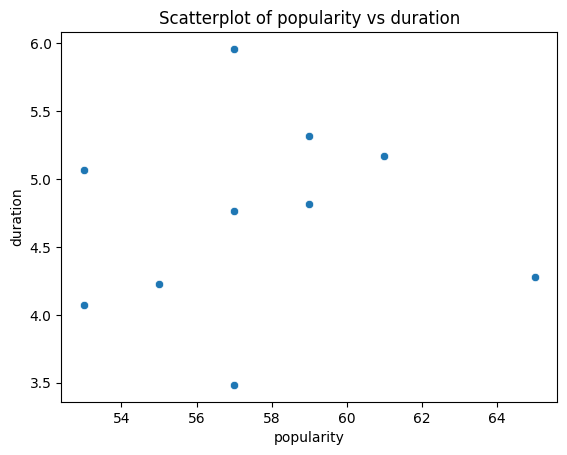

In [13]:
sns.scatterplot(x='popularity', y='duration', data=top_tracks_df)
plt.title('Scatterplot of popularity vs duration')
plt.show()

In [ ]:
#No hay una relacion lineal o de ningún tipo que sea observable en el scatterplot, entre la duracion de la cancion y su popularidad.